In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate


data = pd.read_csv('Call Center Data.csv')


total_obs = len(data)


def calculate_params_and_weights(data, num_groups):
    group_size = len(data) // num_groups
    params = []
    weights = []
    
    for i in range(num_groups):
        start_index = i * group_size
        end_index = (i + 1) * group_size if i < num_groups - 1 else len(data)
        
        group_data = data.iloc[start_index:end_index]
        obs_in_group = group_data['Talk Duration Second (AVG)'].sum()
        lambda_i = group_size  / obs_in_group
        weight_i = group_size / total_obs
        params.append(lambda_i)
        weights.append(weight_i)
    
    return params, weights


def calculate_standard_deviation(params, weights):
    sum_1 = sum(weight / (param ** 2) for weight, param in zip(weights, params))
    sum_2 = sum(weight / param for weight, param in zip(weights, params))
    variance = 2 * sum_1 - sum_2 ** 2
    return round((variance ** 0.5), 2)


def calculate_mu(params, weights):
    mu = sum(weight / param for weight, param in zip(weights, params))
    return round(mu, 2)


def calculate_mad(params, weights, mu):
    mad = 2 * sum(weight * (1 / param) * (np.exp(-param * mu)) for weight, param in zip(weights, params))
    return round(mad, 2)


num_groups_list = [2, 8, 20,40,60,100]


results = []


for num_groups in num_groups_list:
    params, weights = calculate_params_and_weights(data, num_groups)
    standard_deviation = calculate_standard_deviation(params, weights)
    mu = calculate_mu(params, weights)
    mad = calculate_mad(params, weights, mu)
    mad_to_std_ratio = mad / standard_deviation*100
    results.append([num_groups, standard_deviation, mu, mad, mad_to_std_ratio]) 

# Print the results table
headers = ["K", "Standard Deviation", "Mu (μ)", "MAD (Mean Absolute Deviation)","MAD/Standard Deviation"]
print(tabulate(results, headers=headers, floatfmt=".3f", tablefmt="grid"))


+-----+----------------------+----------+---------------------------------+--------------------------+
|   K |   Standard Deviation |   Mu (μ) |   MAD (Mean Absolute Deviation) |   MAD/Standard Deviation |
+=====+======================+==========+=================================+==========================+
|   2 |              158.730 |  157.550 |                         116.400 |                   73.332 |
+-----+----------------------+----------+---------------------------------+--------------------------+
|   3 |              158.700 |  157.550 |                         116.360 |                   73.321 |
+-----+----------------------+----------+---------------------------------+--------------------------+


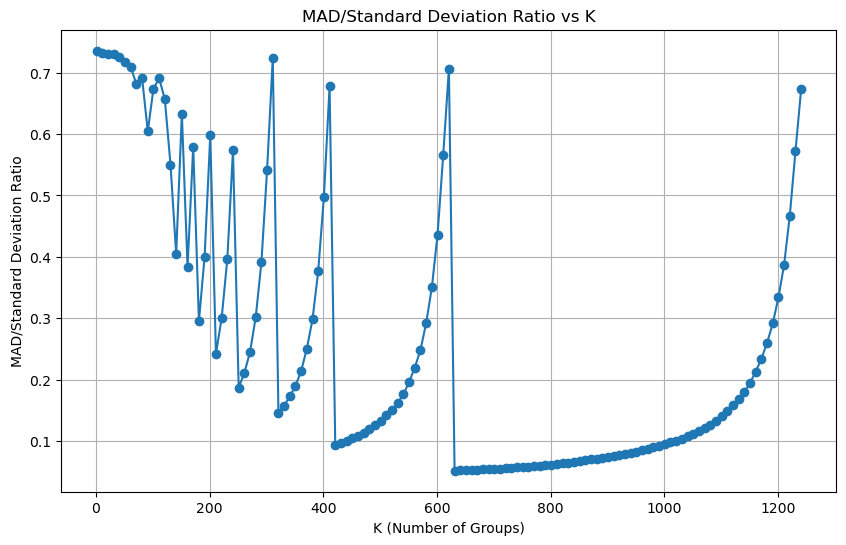

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Call Center Data.csv')
total_obs = len(data)

def calculate_params_and_weights(data, num_groups):
    group_size = len(data) // num_groups
    params = []
    weights = []
    
    for i in range(num_groups):
        start_index = i * group_size
        end_index = (i + 1) * group_size if i < num_groups - 1 else len(data)
        
        group_data = data.iloc[start_index:end_index]
        obs_in_group = group_data['Talk Duration Second (AVG)'].sum()
        lambda_i = group_size  / obs_in_group
        weight_i = group_size / total_obs
        params.append(lambda_i)
        weights.append(weight_i)
    
    return params, weights

def calculate_standard_deviation(params, weights):
    sum_1 = sum(weight / (param ** 2) for weight, param in zip(weights, params))
    sum_2 = sum(weight / param for weight, param in zip(weights, params))
    variance = 2 * sum_1 - sum_2 ** 2
    return round((variance ** 0.5), 2)

def calculate_mu(params, weights):
    mu = sum(weight / param for weight, param in zip(weights, params))
    return round(mu, 2)

def calculate_mad(params, weights, mu):
    mad = 2 * sum(weight * (1 / param) * (np.exp(-param * mu)) for weight, param in zip(weights, params))
    return round(mad, 2)

def plot_mad_to_std_ratio(num_groups_list):
    mad_to_std_ratios = []

    for num_groups in num_groups_list:
        params, weights = calculate_params_and_weights(data, num_groups)
        standard_deviation = calculate_standard_deviation(params, weights)
        mu = calculate_mu(params, weights)
        mad = calculate_mad(params, weights, mu)
        mad_to_std_ratio = mad / standard_deviation
        mad_to_std_ratios.append(mad_to_std_ratio)

    plt.figure(figsize=(10, 6))
    plt.plot(num_groups_list, mad_to_std_ratios, marker='o', linestyle='-')
    plt.title('MAD/Standard Deviation Ratio vs K')
    plt.xlabel('K (Number of Groups)')
    plt.ylabel('MAD/Standard Deviation Ratio')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    num_groups_list = list(range(1, total_obs, 10))
    plot_mad_to_std_ratio(num_groups_list)
    



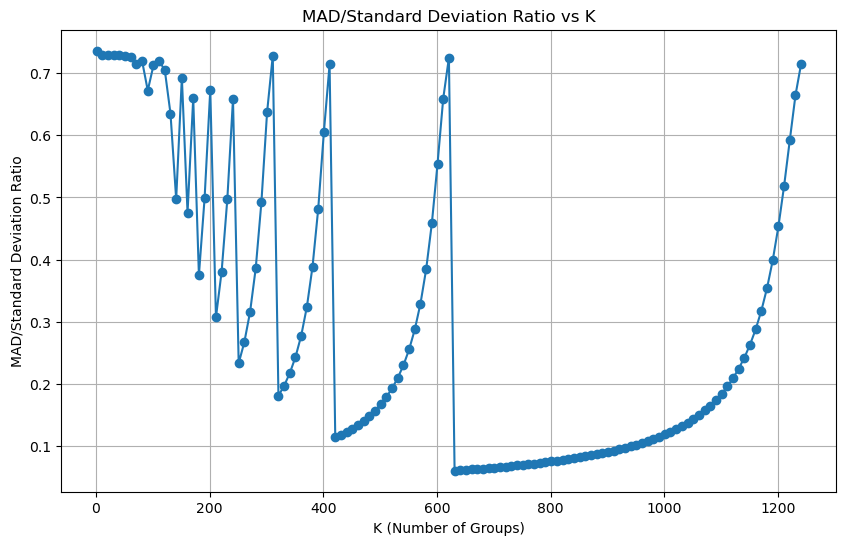

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Call Center Data1.csv')
total_obs = len(data)

def calculate_params_and_weights(data, num_groups):
    group_size = len(data) // num_groups
    params = []
    weights = []
    
    for i in range(num_groups):
        start_index = i * group_size
        end_index = (i + 1) * group_size if i < num_groups - 1 else len(data)
        
        group_data = data.iloc[start_index:end_index]
        obs_in_group = group_data['Talk Duration Second (AVG)'].sum()
        lambda_i = group_size  / obs_in_group
        weight_i = group_size / total_obs
        params.append(lambda_i)
        weights.append(weight_i)
    
    return params, weights

def calculate_standard_deviation(params, weights):
    sum_1 = sum(weight / (param ** 2) for weight, param in zip(weights, params))
    sum_2 = sum(weight / param for weight, param in zip(weights, params))
    variance = 2 * sum_1 - sum_2 ** 2
    return round((variance ** 0.5), 2)

def calculate_mu(params, weights):
    mu = sum(weight / param for weight, param in zip(weights, params))
    return round(mu, 2)

def calculate_mad(params, weights, mu):
    mad = 2 * sum(weight * (1 / param) * (np.exp(-param * mu)) for weight, param in zip(weights, params))
    return round(mad, 2)

def plot_mad_to_std_ratio(num_groups_list):
    mad_to_std_ratios = []

    for num_groups in num_groups_list:
        params, weights = calculate_params_and_weights(data, num_groups)
        standard_deviation = calculate_standard_deviation(params, weights)
        mu = calculate_mu(params, weights)
        mad = calculate_mad(params, weights, mu)
        mad_to_std_ratio = mad / standard_deviation
        mad_to_std_ratios.append(mad_to_std_ratio)

    plt.figure(figsize=(10, 6))
    plt.plot(num_groups_list, mad_to_std_ratios, marker='o', linestyle='-')
    plt.title('MAD/Standard Deviation Ratio vs K')
    plt.xlabel('K (Number of Groups)')
    plt.ylabel('MAD/Standard Deviation Ratio')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    num_groups_list = list(range(1, total_obs, 10))
    plot_mad_to_std_ratio(num_groups_list)
    



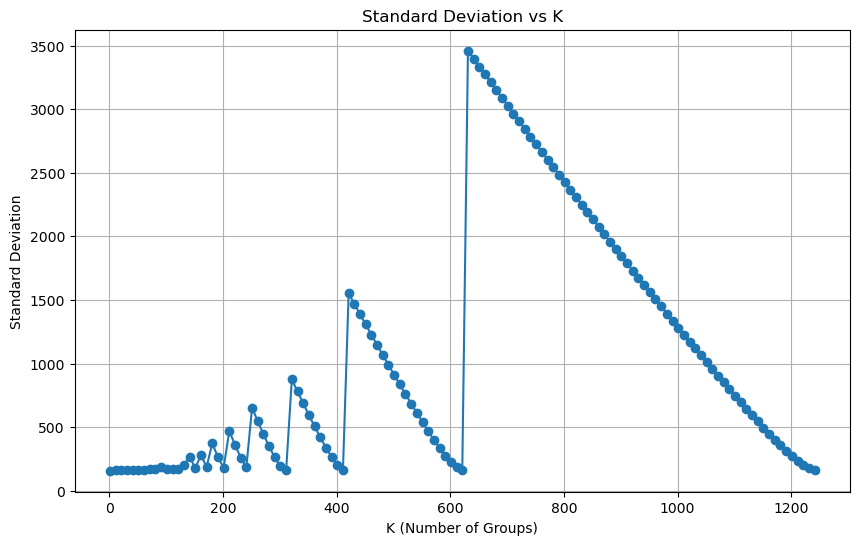

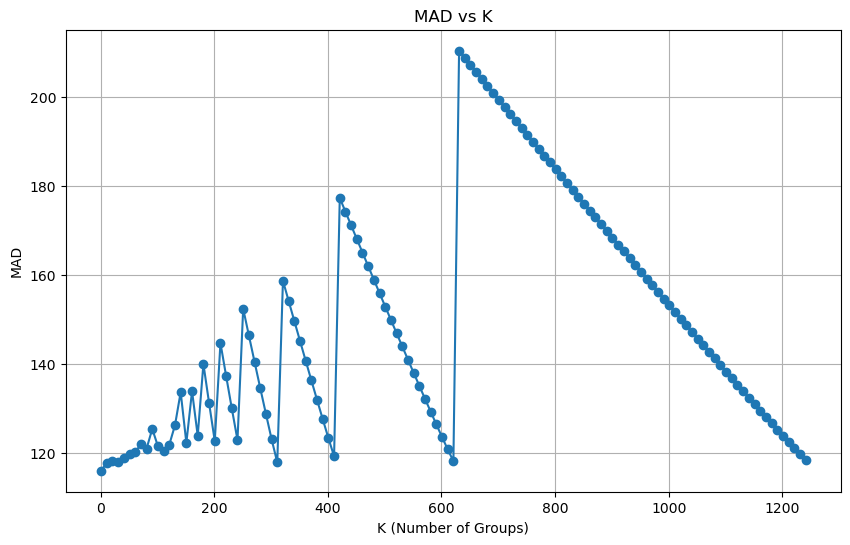

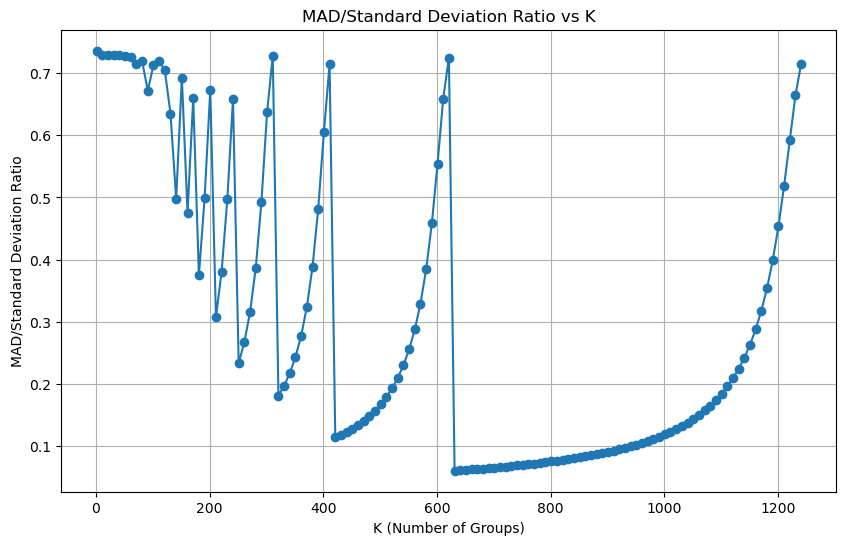

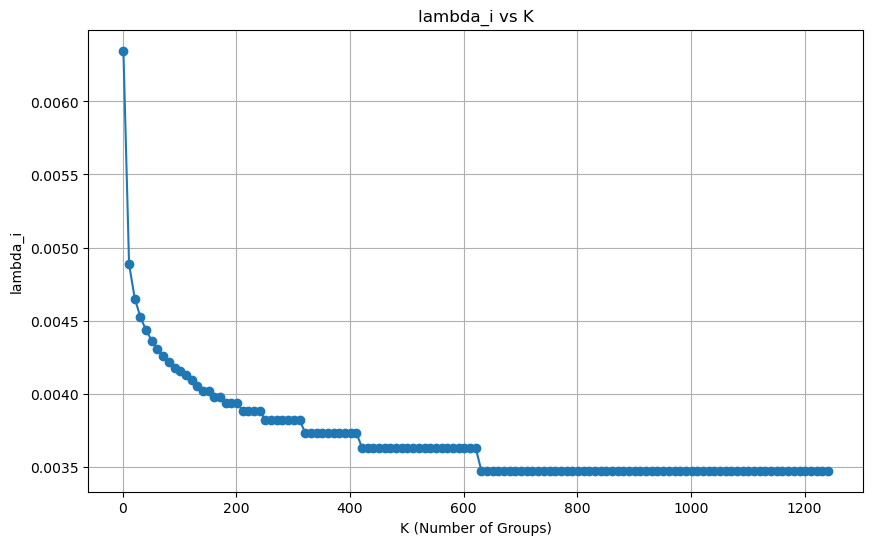

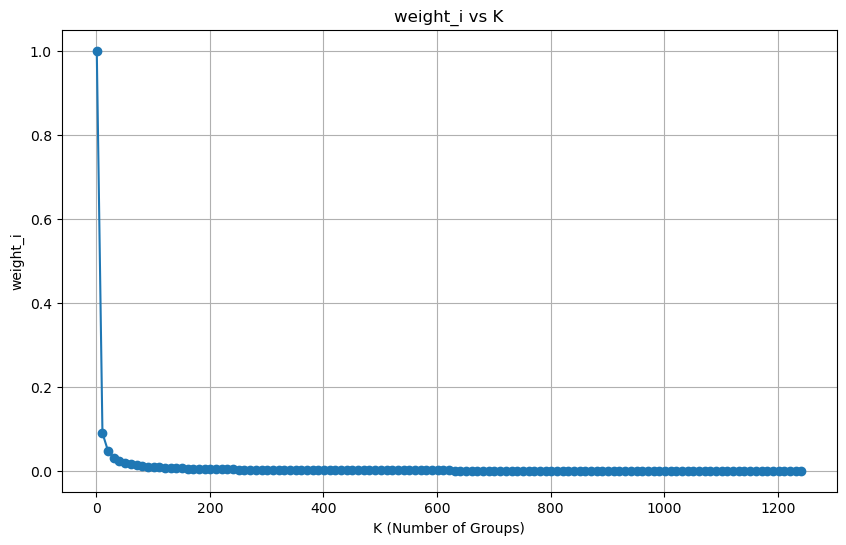

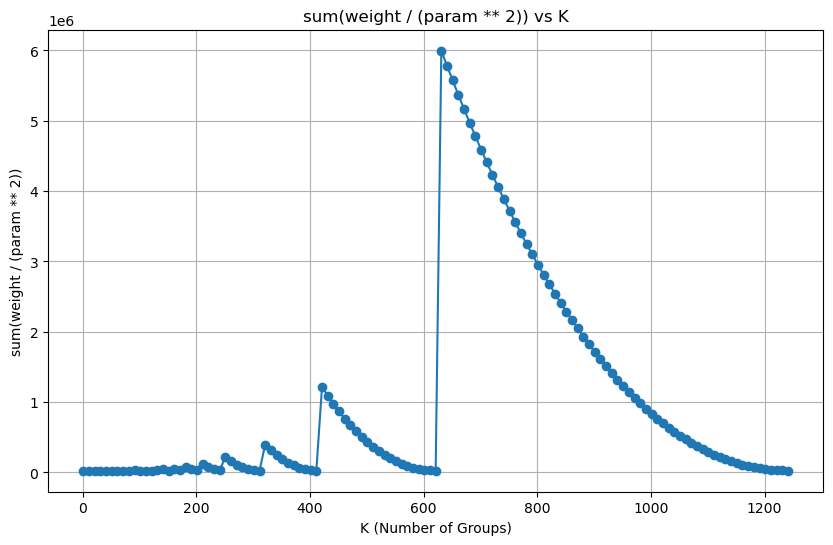

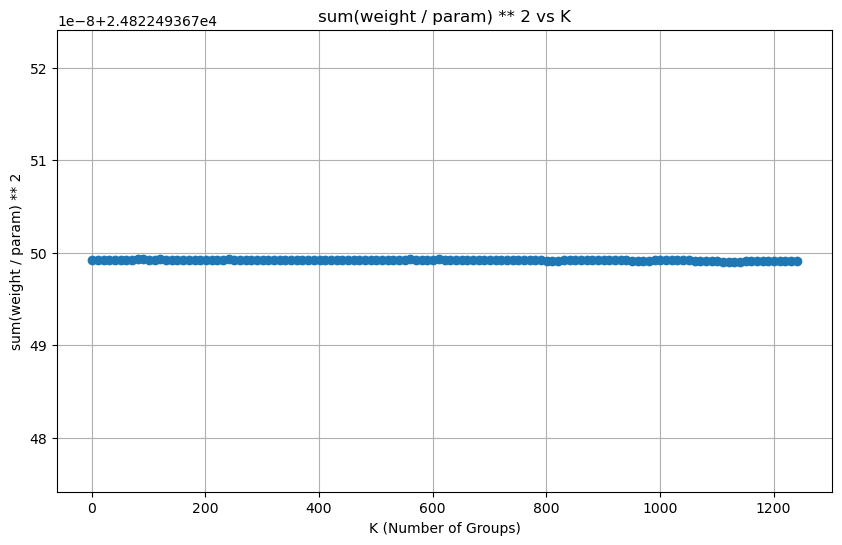

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('Call Center Data1.csv')
total_obs = len(data)

# Function to calculate parameters and weights
def calculate_params_and_weights(data, num_groups):
    group_size = len(data) // num_groups
    params = []
    weights = []
    
    for i in range(num_groups):
        start_index = i * group_size
        end_index = (i + 1) * group_size if i < num_groups - 1 else len(data)
        
        group_data = data.iloc[start_index:end_index]
        obs_in_group = group_data['Talk Duration Second (AVG)'].sum()
        lambda_i = group_size / obs_in_group
        weight_i = group_size / total_obs
        params.append(lambda_i)
        weights.append(weight_i)
    
    return params, weights

# Function to calculate standard deviation
def calculate_standard_deviation(params, weights):
    sum_1 = sum(weight / (param ** 2) for weight, param in zip(weights, params))
    sum_2 = sum(weight / param for weight, param in zip(weights, params))
    variance = 2 * sum_1 - sum_2 ** 2
    return (variance ** 0.5), sum_1, sum_2

# Function to calculate mu
def calculate_mu(params, weights):
    mu = sum(weight / param for weight, param in zip(weights, params))
    return mu

# Function to calculate MAD
def calculate_mad(params, weights, mu):
    mad = 2 * sum(weight * (1 / param) * (np.exp(-param * mu)) for weight, param in zip(weights, params))
    return mad

# Function to plot the results
def plot_metrics(num_groups_list):
    std_devs = []
    mus = []
    mads = []
    mad_to_std_ratios = []
    sum_1_list = []
    sum_2_squared_list = []
    lambda_list = []
    weight_list = []

    for num_groups in num_groups_list:
        params, weights = calculate_params_and_weights(data, num_groups)
        std_dev, sum_1, sum_2 = calculate_standard_deviation(params, weights)
        mu = calculate_mu(params, weights)
        mad = calculate_mad(params, weights, mu)
        mad_to_std_ratio = mad / std_dev

        std_devs.append(std_dev)
        mus.append(mu)
        mads.append(mad)
        mad_to_std_ratios.append(mad_to_std_ratio)
        sum_1_list.append(sum_1)
        sum_2_squared_list.append(sum_2 ** 2)
        lambda_list.append(params)
        weight_list.append(weights)

    # Plot Standard Deviation
    plt.figure(figsize=(10, 6))
    plt.plot(num_groups_list, std_devs, marker='o', linestyle='-')
    plt.title('Standard Deviation vs K')
    plt.xlabel('K (Number of Groups)')
    plt.ylabel('Standard Deviation')
    plt.grid(True)
    plt.show()

    # Plot MAD
    plt.figure(figsize=(10, 6))
    plt.plot(num_groups_list, mads, marker='o', linestyle='-')
    plt.title('MAD vs K')
    plt.xlabel('K (Number of Groups)')
    plt.ylabel('MAD')
    plt.grid(True)
    plt.show()

    # Plot MAD/Standard Deviation Ratio
    plt.figure(figsize=(10, 6))
    plt.plot(num_groups_list, mad_to_std_ratios, marker='o', linestyle='-')
    plt.title('MAD/Standard Deviation Ratio vs K')
    plt.xlabel('K (Number of Groups)')
    plt.ylabel('MAD/Standard Deviation Ratio')
    plt.grid(True)
    plt.show()

    # Plot lambda_i vs K
    plt.figure(figsize=(10, 6))
    for i in range(len(lambda_list[0])):
        plt.plot(num_groups_list, [lambda_list[j][i] for j in range(len(num_groups_list))], marker='o', linestyle='-')
    plt.title('lambda_i vs K')
    plt.xlabel('K (Number of Groups)')
    plt.ylabel('lambda_i')
    plt.grid(True)
    plt.show()

    # Plot weight_i vs K
    plt.figure(figsize=(10, 6))
    for i in range(len(weight_list[0])):
        plt.plot(num_groups_list, [weight_list[j][i] for j in range(len(num_groups_list))], marker='o', linestyle='-')
    plt.title('weight_i vs K')
    plt.xlabel('K (Number of Groups)')
    plt.ylabel('weight_i')
    plt.grid(True)
    plt.show()

    # Plot sum(weight / (param ** 2)) vs K
    plt.figure(figsize=(10, 6))
    plt.plot(num_groups_list, sum_1_list, marker='o', linestyle='-')
    plt.title('sum(weight / (param ** 2)) vs K')
    plt.xlabel('K (Number of Groups)')
    plt.ylabel('sum(weight / (param ** 2))')
    plt.grid(True)
    plt.show()

    # Plot (sum(weight / param)) ** 2 vs K
    plt.figure(figsize=(10, 6))
    plt.plot(num_groups_list, sum_2_squared_list, marker='o', linestyle='-')
    plt.title('sum(weight / param) ** 2 vs K')
    plt.xlabel('K (Number of Groups)')
    plt.ylabel('sum(weight / param) ** 2')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    num_groups_list = list(range(1, total_obs, 10))
    plot_metrics(num_groups_list)


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Call Center Data.csv')
total_obs = len(data)

def calculate_params_and_weights(data, num_groups):
    group_size = len(data) // num_groups
    params = []
    weights = []
    
    for i in range(num_groups):
        start_index = i * group_size
        end_index = (i + 1) * group_size if i < num_groups - 1 else len(data)
        
        group_data = data.iloc[start_index:end_index]
        obs_in_group = group_data['Talk Duration Second (AVG)'].sum()
        lambda_i = group_size  / obs_in_group
        weight_i = group_size / total_obs
        params.append(lambda_i)
        weights.append(weight_i)
    
    return params, weights

def calculate_standard_deviation(params, weights):
    sum_1 = sum(weight / (param ** 2) for weight, param in zip(weights, params))
    sum_2 = sum(weight / param for weight, param in zip(weights, params))
    variance = 2 * sum_1 - sum_2 ** 2
    return round((variance ** 0.5), 2)

def calculate_mu(params, weights):
    mu = sum(weight / param for weight, param in zip(weights, params))
    return round(mu, 2)

def calculate_mad(params, weights, mu):
    mad = 2 * sum(weight * (1 / param) * (np.exp(-param * mu)) for weight, param in zip(weights, params))
    return round(mad, 2)

def calculate_H_sigma_ratio(num_groups):
    params, weights = calculate_params_and_weights(data, num_groups)
    standard_deviation = calculate_standard_deviation(params, weights)
    mu = calculate_mu(params, weights)
    mad = calculate_mad(params, weights, mu)
    H_sigma_ratio = mad / standard_deviation
    return mad, standard_deviation, H_sigma_ratio

if __name__ == "__main__":
    k2_mad, k2_sigma, k2_H_sigma_ratio = calculate_H_sigma_ratio(2)
    k3_mad, k3_sigma, k3_H_sigma_ratio = calculate_H_sigma_ratio(3)

    print(f"K=2: H (MAD) = {k2_mad}, σ (Standard Deviation) = {k2_sigma}, H/σ = {k2_H_sigma_ratio}")
    print(f"K=3: H (MAD) = {k3_mad}, σ (Standard Deviation) = {k3_sigma}, H/σ = {k3_H_sigma_ratio}")


K=2: H (MAD) = 116.4, σ (Standard Deviation) = 158.73, H/σ = 0.7333207333207334
K=3: H (MAD) = 116.36, σ (Standard Deviation) = 158.7, H/σ = 0.7332073093887839


In [16]:
import pandas as pd
import numpy as np


data = pd.read_csv('Call Center Data.csv')
total_obs = len(data)


def calculate_params_and_weights(data, num_groups):
    group_size = len(data) // num_groups
    params = []
    weights = []
    
    for i in range(num_groups):
        start_index = i * group_size
        end_index = (i + 1) * group_size if i < num_groups - 1 else len(data)
        
        group_data = data.iloc[start_index:end_index]
        obs_in_group = group_data['Talk Duration Second (AVG)'].sum()
        lambda_i = group_size  / obs_in_group
        weight_i = group_size / total_obs
        params.append(lambda_i)
        weights.append(weight_i)
    
    return params, weights


def calculate_standard_deviation(params, weights):
    sum_1 = sum(weight / (param ** 2) for weight, param in zip(weights, params))
    sum_2 = sum(weight / param for weight, param in zip(weights, params))
    variance = 2 * sum_1 - sum_2 ** 2
    return round((variance ** 0.5), 2)


def calculate_mu(params, weights):
    mu = sum(weight / param for weight, param in zip(weights, params))
    return round(mu, 2)


def calculate_mad(params, weights, mu):
    mad = 2 * sum(weight * (1 / param) * (np.exp(-param * mu)) for weight, param in zip(weights, params))
    return round(mad, 2)


num_groups = 2

params, weights = calculate_params_and_weights(data, num_groups)
standard_deviation = calculate_standard_deviation(params, weights)
mu = calculate_mu(params, weights)
mad = calculate_mad(params, weights, mu)
mad_to_std_ratio = mad / standard_deviation

# Print the results for lambda = 2
print("Results for group = 2:")
print("lambda_1:", params[0])
print("lambda_2:", params[1])
print("weight_1:", weights[0])
print("weight_2:", weights[1])
print("Standard Deviation:", standard_deviation)
print("Mu (μ):", mu)
print("MAD (Mean Absolute Deviation):", mad)
print("MAD/Standard Deviation:", mad_to_std_ratio)


Results for group = 2:
lambda_1: 0.006906993192467509
lambda_2: 0.005862544438086841
weight_1: 0.49960031974420466
weight_2: 0.49960031974420466
Standard Deviation: 158.73
Mu (μ): 157.55
MAD (Mean Absolute Deviation): 116.4
MAD/Standard Deviation: 0.7333207333207334


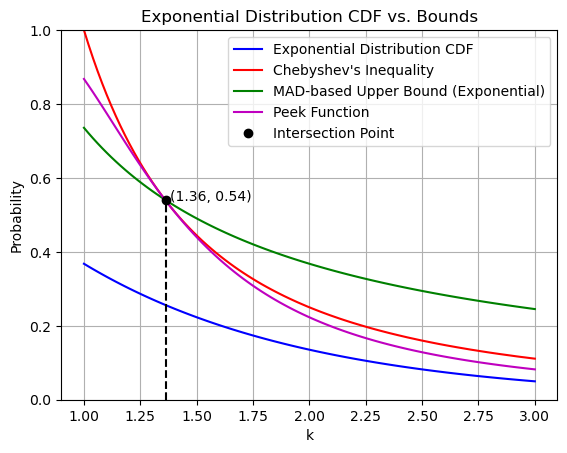

Intersection Points:
Chebyshev-MAD Intersection Point:
k = 1.3636
Probability = 0.5378
Peek-MAD Intersection Point:
k = 1.3636
Probability = 0.5396

Table:
     k  Chebyshev Bound  MAD-based Bound  Peek Function  Exp Dist CDF
0  1.0             1.00             0.74           0.87          0.37
1  1.5             0.44             0.49           0.44          0.22
2  2.0             0.25             0.37           0.22          0.14
3  2.5             0.16             0.29           0.13          0.08
4  3.0             0.11             0.25           0.08          0.05
5  3.5             0.08             0.21           0.06          0.03
6  4.0             0.06             0.18           0.04          0.02


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd

def chebyshev_inequality(k):
    return np.round(1 / (np.array(k)**2), 4)

def mad_upper_bound(k, lambd):
    H = 2 / (np.e)
    return [H / k_val for k_val in k]

def peek(k):
    return (1 - (2 / np.e)**2) / (np.array(k)**2 - 2 * np.array(k) * (2 / np.e) + 1)

# Exponential Distribution
k = np.linspace(1, 3, 100)
lambda_ = 1

chebyshev_bound = chebyshev_inequality(k)
mad_bound = mad_upper_bound(k, lambda_)
peek_line = peek(k)

exponential_dist = expon(scale=1 / lambda_)
cdf = 1 - exponential_dist.cdf(k) + exponential_dist.cdf(-k)

exp_intersection_index = np.argmin(np.abs(chebyshev_bound - mad_bound))
peek_intersection_index = np.argmin(np.abs(peek_line - mad_bound))
exp_intersection_k = k[exp_intersection_index]
peek_intersection_k = k[peek_intersection_index]
exp_intersection_prob = chebyshev_bound[exp_intersection_index]
peek_intersection_prob = mad_bound[peek_intersection_index]

plt.plot(k, cdf, 'b-', label="Exponential Distribution CDF")
plt.plot(k, chebyshev_bound, 'r-', label="Chebyshev's Inequality")
plt.plot(k, mad_bound, 'g-', label="MAD-based Upper Bound (Exponential)")
plt.plot(k, peek_line, 'm-', label="Peek Function")
plt.plot(peek_intersection_k, peek_intersection_prob, 'ko', label="Intersection Point")
plt.xlabel('k')
plt.ylabel('Probability')
plt.title("Exponential Distribution CDF vs. Bounds")
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  

# 标注交点
plt.text(peek_intersection_k + 0.02, peek_intersection_prob, f'({np.round(peek_intersection_k, 2)}, {np.round(peek_intersection_prob, 2)})', ha='left')
plt.plot([peek_intersection_k, peek_intersection_k], [0, peek_intersection_prob], 'k--')  # Vertical dashed line

plt.show()

print("Intersection Points:")
print("Chebyshev-MAD Intersection Point:")
print("k =", np.round(exp_intersection_k, 4))
print("Probability =", np.round(exp_intersection_prob, 4))
print("Peek-MAD Intersection Point:")
print("k =", np.round(peek_intersection_k, 4))
print("Probability =", np.round(peek_intersection_prob, 4))


# Table
k_values = [1, 1.5, 2, 2.5, 3, 3.5, 4]
chebyshev_bounds = chebyshev_inequality(k_values)
mad_bounds = mad_upper_bound(k_values, lambda_)
peek_values = peek(k_values)
exp_cdfs = 1 - exponential_dist.cdf(k_values) + exponential_dist.cdf([-k_val for k_val in k_values])


data = {
    'k': np.round(k_values, 1),
    'Chebyshev Bound': np.round(chebyshev_bounds, 2),
    'MAD-based Bound': np.round(mad_bounds, 2),
    'Peek Function': np.round(peek_values, 2),
    'Exp Dist CDF': np.round(exp_cdfs, 2),
}
df = pd.DataFrame(data)

print("\nTable:")
print(df)


Intersection Point:
k = 1.4242
Probability = 0.4945


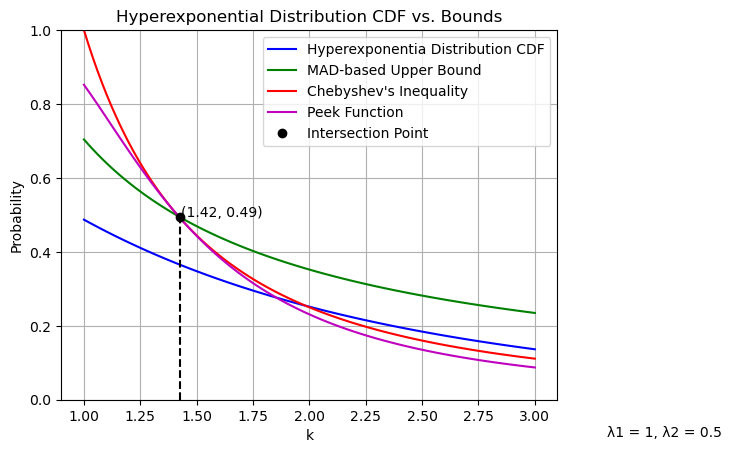

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon


def hyperexponentia_cdf(x, p1, lambda1, p2, lambda2):
    term1 = p1 * (1 - np.exp(-lambda1 * x))
    term2 = p2 * (1 - np.exp(-lambda2 * x))
    return term1 + term2

def mad_upper_bound(k,p1, lambda1, p2, lambda2, mu):
    term1 = 2 * p1 * (np.exp(-lambda1 * mu) / lambda1)
    term2 = 2 * p2 * (np.exp(-lambda2 * mu) / lambda2)
    x_mad = term1 + term2
    variance=2 * ((p1 / lambda1**2) + (p2 / lambda2**2)) - ((p1 / lambda1) + (p2 / lambda2))**2
    x_sigma=np.sqrt(variance)
    return x_mad/(x_sigma*k)

def chebyshev_inequality(k):
    return np.round(1 / (np.array(k) ** 2), 4)

def peek(k,p1, lambda1, p2, lambda2, mu):
    term1 = 2 * p1 * (np.exp(-lambda1 * mu) / lambda1)
    term2 = 2 * p2 * (np.exp(-lambda2 * mu) / lambda2)
    x_mad = term1 + term2
    delta = x_mad/sigma
    return (1 - delta**2) / (np.array(k)**2 - 2 * np.array(k) * delta + 1)


p1=0.5
p2=0.5
lambda1=1
lambda2=0.5
mu=p1/lambda1+p2/lambda2

sigma_squared = 2 * ((p1 / lambda1**2) + (p2 / lambda2**2)) - ((p1 / lambda1) + (p2 / lambda2))**2
sigma = np.sqrt(sigma_squared)



k = np.linspace(1, 3, 100)

hyper_cdf_vals = 1-hyperexponentia_cdf(k, p1, lambda1, p2, lambda2)+0
# mad_bounds = mad_upper_bound(p1, lambda1, p2, lambda2, mu)
mad_bounds = np.full_like(k, mad_upper_bound(k, p1, lambda1, p2, lambda2, mu))

chebyshev_bounds = chebyshev_inequality(k)
peek_line = peek(k,p1, lambda1, p2, lambda2, mu)

intersection_index = np.argmin(np.abs(mad_bounds - chebyshev_bounds))

intersection_k = k[intersection_index]

intersection_prob = mad_bounds[intersection_index]

print("Intersection Point:")
print("k =", np.round(intersection_k, 4))
print("Probability =", np.round(intersection_prob, 4))


plt.plot(k, hyper_cdf_vals, 'b-', label="Hyperexponentia Distribution CDF")
plt.plot(k, mad_bounds, 'g-', label="MAD-based Upper Bound")
plt.plot(k, chebyshev_bounds, 'r-', label="Chebyshev's Inequality")
plt.plot(k, peek_line, 'm-', label="Peek Function")
plt.plot(intersection_k, intersection_prob, 'ko', label="Intersection Point")
plt.ylim(0, 1)  

plt.plot([intersection_k, intersection_k], [0, intersection_prob], 'k--')  # Vertical dashed line
plt.xlabel('k')
plt.ylabel('Probability')
plt.title("Hyperexponential Distribution CDF vs. Bounds")
plt.legend()
plt.grid(True)
plt.text(intersection_k + 0.37, intersection_prob, f'({np.round(intersection_k, 2)}, {np.round(intersection_prob, 2)})', ha='right')
# plt.text(intersection_k + 0.03, -0.1, np.round(intersection_k, 2), ha='left')
plt.text(1.1, -0.1, f'λ1 = {lambda1}, λ2 = {lambda2}', ha='left', transform=plt.gca().transAxes)
plt.show()




Intersection Point with MAD and Chebyshev:
k = 1.303
Probability = 0.5863


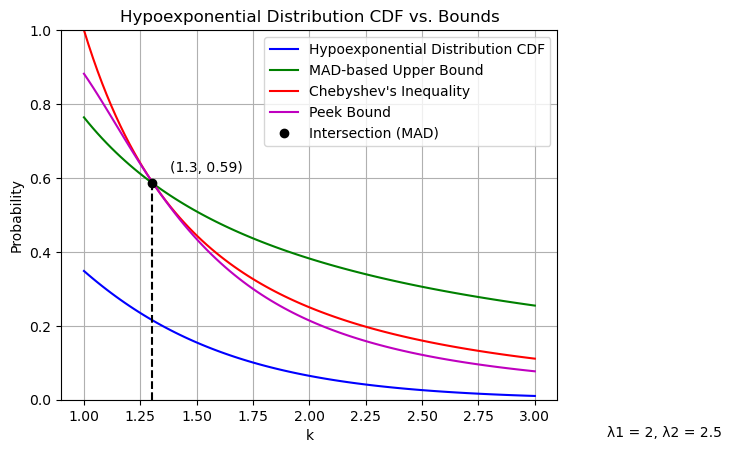

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def hypoexponential_cdf(x, lambda1, lambda2):
    term1 = (lambda2 / (lambda2 - lambda1)) * np.exp(-lambda1 * x)
    term2 = (lambda1 / (lambda2 - lambda1)) * np.exp(-lambda2 * x)
    return 1 - term1 + term2

def mad_upper_bound(k, lambda1, lambda2, H1, H2):
    # Calculate H using the provided formula
    H = (lambda2 * np.exp(-lambda1 / lambda2) * H1 - lambda1 * np.exp(-lambda2 / lambda1) * H2) / (lambda2 - lambda1)
    
    # Calculate the variance for the given lambdas
    variance = 1 / (lambda1 ** 2) + 1 / (lambda2 ** 2)
    
    # Standard deviation (sigma)
    x_sigma = np.sqrt(variance)
    
    # Calculate the MAD-based bound
    mad_bound = H / (x_sigma * k)
    
    return mad_bound

def chebyshev_inequality(k):
    return 1 / (np.array(k) ** 2)

def peek(k, H1, lambda1, H2, lambda2):
    # Calculate H using the provided formula
    x_mad = (lambda2 * np.exp(-lambda1 / lambda2) * H1 - lambda1 * np.exp(-lambda2 / lambda1) * H2) / (lambda2 - lambda1)
    
    # Calculate the variance for the given lambdas
    variance = 1 / (lambda1 ** 2) + 1 / (lambda2 ** 2)
    
    # Standard deviation (sigma)
    x_sigma = np.sqrt(variance)
    
    delta = x_mad / x_sigma
    peek_bound = (1 - delta ** 2) / (np.array(k) ** 2 - 2 * np.array(k) * delta + 1)
    
    return peek_bound

# Parameters
lambda1 = 2
lambda2 = 2.5
H1 = 2 / (np.e * lambda1)
H2 = 2 / (np.e * lambda2)

# Generate k values
k = np.linspace(1, 3, 100)

# Calculate CDF of hypoexponential distribution
hypo_cdf_vals = 1 - hypoexponential_cdf(k, lambda1, lambda2)

# Calculate MAD-based upper bound
mad_bounds = mad_upper_bound(k, lambda1, lambda2, H1, H2)

# Calculate Chebyshev's inequality bounds
chebyshev_bounds = chebyshev_inequality(k)

# Calculate Peek bounds
peek_bounds = peek(k, H1, lambda1, H2, lambda2)

# Find intersection point between MAD and Chebyshev bounds
intersection_index = np.argmin(np.abs(mad_bounds - chebyshev_bounds))
intersection_k = k[intersection_index]
intersection_prob = mad_bounds[intersection_index]

print("Intersection Point with MAD and Chebyshev:")
print("k =", np.round(intersection_k, 4))
print("Probability =", np.round(intersection_prob, 4))

# Plotting

plt.plot(k, hypo_cdf_vals, 'b-', label="Hypoexponential Distribution CDF")
plt.plot(k, mad_bounds, 'g-', label="MAD-based Upper Bound")
plt.plot(k, chebyshev_bounds, 'r-', label="Chebyshev's Inequality")
plt.plot(k, peek_bounds, 'm-', label="Peek Bound")

plt.plot(intersection_k, intersection_prob, 'ko', label="Intersection (MAD)")

plt.ylim(0, 1)  
plt.xlabel('k')
plt.ylabel('Probability')
plt.title("Hypoexponential Distribution CDF vs. Bounds")
plt.legend()
plt.grid(True)

# Adding the intersection point text
plt.text(intersection_k + 0.4, intersection_prob + 0.03, f'({np.round(intersection_k, 2)}, {np.round(intersection_prob, 2)})', ha='right')

# Adding the vertical dashed line
plt.plot([intersection_k, intersection_k], [0, intersection_prob], 'k--')
plt.text(1.1, -0.1, f'λ1 = {lambda1}, λ2 = {lambda2}', ha='left', transform=plt.gca().transAxes)

plt.show()


In [11]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy.special import gamma
import math

data = pd.read_csv('Call Center Data.csv')

def calculate_params(data):
    obs = data['Waiting Time Second (AVG)'].sum()
    lambda_i = len(data) / obs
    return lambda_i

def calculate_standard_deviation(k, lambda_i):
    return np.sqrt(k) / lambda_i

def calculate_erlang_pdf(k, lambda_i, x):
    return 1 - np.sum((1 / np.math.factorial(n)) * np.exp(-lambda_i * x) * (lambda_i * x) ** n for n in range(k))

# def calculate_integral_term(k, lambda_i, mu): spy
#     I_0 = -1/lambda_i * (np.exp(-lambda_i * mu) - 1)
#     I_n = [I_0]
#     for n in range(1, k):
#         I_n.append(-1/lambda_i * np.exp(-lambda_i * mu) * (lambda_i * mu) ** n + n * I_n[n-1])
#     return I_n

# def calculate_mad(k, lambda_i, mu, I_n):
#     return 2 * mu - 2 * sum((1 / np.math.factorial(n)) * (-1/lambda_i * np.exp(-lambda_i * mu) * (lambda_i * mu) ** n + n * I_n[n-1]) for n in range(k))

def calculate_integral_term(k, lambda_i, mu):
    I_n = [0] * (k + 1)
    I_n[0] = -1 / lambda_i * (math.exp(-lambda_i * mu) - 1)
    for n in range(1, k):
        I_n[n] = -1 / lambda_i * math.exp(-lambda_i * mu) * (lambda_i * mu)**n + n * I_n[n - 1]
    return I_n

def calculate_mad(k, lambda_i, mu, I_n):
    H = 2 * mu
    for n in range(k):
        H -= 2 / math.factorial(n) * (-1 / lambda_i * math.exp(-lambda_i * mu) * (lambda_i * mu)**n + n * I_n[n-1])
    return H


k = 2
lambda_i = calculate_params(data)
mu = k / lambda_i
std_dev = calculate_standard_deviation(k, lambda_i)
I_n = calculate_integral_term(k, lambda_i, mu)
mad = calculate_mad(k, lambda_i, mu, I_n)

# Print the results table
results = [[k, std_dev, mu, mad, mad/std_dev*100]] 
headers = ["K", "Standard Deviation", "Mu (μ)", "MAD (Mean Absolute Deviation)", "MAD/Standard Deviation"]
print(tabulate(results, headers=headers, floatfmt=".4f", tablefmt="grid"))


+-----+----------------------+----------+---------------------------------+--------------------------+
|   K |   Standard Deviation |   Mu (μ) |   MAD (Mean Absolute Deviation) |   MAD/Standard Deviation |
+=====+======================+==========+=================================+==========================+
|   2 |             328.5430 | 464.6299 |                        716.1532 |                 217.9786 |
+-----+----------------------+----------+---------------------------------+--------------------------+


In [27]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import math

data = pd.read_csv('Call Center Data.csv')

def calculate_params(data):
    obs = data['Waiting Time Second (AVG)'].sum()
    lambda_i = len(data) / obs
    return lambda_i

def calculate_standard_deviation(k, lambda_i):
    return np.sqrt(k) / lambda_i

def calculate_erlang_pdf(k, lambda_i, x):
    return 1 - np.sum((1 / np.math.factorial(n)) * np.exp(-lambda_i * x) * (lambda_i * x) ** n for n in range(k))

def calculate_h_integral(k, lambda_i, mu):
    integral_value = 0
    for x in range(mu):
        term = 1
        for n in range(k):
            term -= 1 / math.factorial(n) * math.exp(-lambda_i * x) * (lambda_i * x)**n
        integral_value += term
    return 2 * integral_value

lambda_i = calculate_params(data)
ks = [2, 8, 20, 40, 60, 100]

results = []

for k in ks:
    mu = int(k / lambda_i)
    mu1 = k / lambda_i
    std_dev = calculate_standard_deviation(k, lambda_i)
    mad = calculate_h_integral(k, lambda_i, mu)
    results.append([k, std_dev, mu1, mad, mad/std_dev*100])

headers = ["K", "Standard Deviation", "Mu (μ)", "MAD (Mean Absolute Deviation)", "MAD/Standard Deviation"]
print(tabulate(results, headers=headers, floatfmt=".4f", tablefmt="grid"))


+-----+----------------------+------------+---------------------------------+--------------------------+
|   K |   Standard Deviation |     Mu (μ) |   MAD (Mean Absolute Deviation) |   MAD/Standard Deviation |
+=====+======================+============+=================================+==========================+
|   2 |             328.5430 |   464.6299 |                        250.1824 |                  76.1491 |
+-----+----------------------+------------+---------------------------------+--------------------------+
|   8 |             657.0859 |  1858.5196 |                        517.7337 |                  78.7924 |
+-----+----------------------+------------+---------------------------------+--------------------------+
|  20 |            1038.9440 |  4646.2990 |                        824.6646 |                  79.3753 |
+-----+----------------------+------------+---------------------------------+--------------------------+
|  40 |            1469.2887 |  9292.5979 |            

In [17]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import math

data = pd.read_csv('Call Center Data.csv')

def calculate_params(data):
    obs1 = data['Waiting Time Second (AVG)'].count()
    obs = data['Waiting Time Second (AVG)'].sum()
    lambda_i = obs1 / obs
    return lambda_i

def calculate_standard_deviation(k, lambda_i):
    return np.sqrt(k) / lambda_i

def calculate_erlang_pdf(k, lambda_i, x):
    return 1 - np.sum((1 / np.math.factorial(n)) * np.exp(-lambda_i * x) * (lambda_i * x) ** n for n in range(k))

def calculate_h_integral(k, lambda_i, mu):
    integral_value = 0
    for x in range(mu):
        term = 1
        for n in range(k):
            term -= 1 / math.factorial(n) * math.exp(-lambda_i * x) * (lambda_i * x)**n
        integral_value += term
    return 2 * integral_value

lambda_i = calculate_params(data)
ks = [2, 3, 10, 20, 40,60]

results = []

for k in ks:
    mu = int(k / lambda_i)
    mu1 = k / lambda_i
    std_dev = calculate_standard_deviation(k, lambda_i)
    mad = calculate_h_integral(k, lambda_i, mu)
    results.append([k, std_dev, mu1, mad, mad/std_dev*100])

headers = ["K", "Standard Deviation", "Mu (μ)", "MAD (Mean Absolute Deviation)", "MAD/Standard Deviation"]
print(tabulate(results, headers=headers, floatfmt=".4f", tablefmt="grid"))


+-----+----------------------+------------+---------------------------------+--------------------------+
|   K |   Standard Deviation |     Mu (μ) |   MAD (Mean Absolute Deviation) |   MAD/Standard Deviation |
+=====+======================+============+=================================+==========================+
|   2 |             328.5430 |   464.6299 |                        250.1824 |                  76.1491 |
+-----+----------------------+------------+---------------------------------+--------------------------+
|   3 |             402.3813 |   696.9448 |                        310.6247 |                  77.1966 |
+-----+----------------------+------------+---------------------------------+--------------------------+
|  10 |             734.6444 |  2323.1495 |                        580.5947 |                  79.0307 |
+-----+----------------------+------------+---------------------------------+--------------------------+
|  20 |            1038.9440 |  4646.2990 |            

In [15]:
import pandas as pd
import numpy as np
from tabulate import tabulate


data = pd.read_csv('Call Center Data.csv')


total_obs = len(data)


def calculate_params_and_weights(data, num_groups):
    group_size = len(data) // num_groups
    params = []
    weights = []
    
    for i in range(num_groups):
        start_index = i * group_size
        end_index = (i + 1) * group_size if i < num_groups - 1 else len(data)
        
        group_data = data.iloc[start_index:end_index]
        obs_in_group = group_data['Talk Duration Second (AVG)'].sum()
        lambda_i = group_size  / obs_in_group
        weight_i = group_size / total_obs
        params.append(lambda_i)
        weights.append(weight_i)
    
    return params, weights


def calculate_standard_deviation(params, weights):
    sum_1 = sum(weight / (param ** 2) for weight, param in zip(weights, params))
    sum_2 = sum(weight / param for weight, param in zip(weights, params))
    variance = 2 * sum_1 - sum_2 ** 2
    return round((variance ** 0.5), 2)


def calculate_mu(params, weights):
    mu = sum(weight / param for weight, param in zip(weights, params))
    return round(mu, 2)


def calculate_mad(params, weights, mu):
    mad = 2 * sum(weight * (1 / param) * (np.exp(-param * mu)) for weight, param in zip(weights, params))
    return round(mad, 2)


num_groups_list = [2,3, 10, 20,40,60]


results = []


for num_groups in num_groups_list:
    params, weights = calculate_params_and_weights(data, num_groups)
    standard_deviation = calculate_standard_deviation(params, weights)
    mu = calculate_mu(params, weights)
    mad = calculate_mad(params, weights, mu)
    mad_to_std_ratio = mad / standard_deviation*100
    results.append([num_groups, standard_deviation, mu, mad, mad_to_std_ratio]) 

# Print the results table
headers = ["K", "Standard Deviation", "Mu (μ)", "MAD (Mean Absolute Deviation)","MAD/Standard Deviation"]
print(tabulate(results, headers=headers, floatfmt=".3f", tablefmt="grid"))


+-----+----------------------+----------+---------------------------------+--------------------------+
|   K |   Standard Deviation |   Mu (μ) |   MAD (Mean Absolute Deviation) |   MAD/Standard Deviation |
+=====+======================+==========+=================================+==========================+
|   2 |              158.730 |  157.550 |                         116.400 |                   73.332 |
+-----+----------------------+----------+---------------------------------+--------------------------+
|   3 |              158.700 |  157.550 |                         116.360 |                   73.321 |
+-----+----------------------+----------+---------------------------------+--------------------------+
|  10 |              159.290 |  157.550 |                         116.610 |                   73.206 |
+-----+----------------------+----------+---------------------------------+--------------------------+
|  20 |              160.980 |  157.550 |                         117.680

In [4]:
import pandas as pd
import numpy as np

# Step 1: Read the data
data = pd.read_csv('Call Center Data.csv')
talk_duration = data['Talk Duration Second (AVG)']

# Step 2: Split the data into two halves
mid_point = len(talk_duration) // 2
group1 = talk_duration[:mid_point]
group2 = talk_duration[mid_point:]

# Calculate the number of observations
N = len(talk_duration)
N1 = len(group1)
N2 = len(group2)

# Sum of observations in each group
sum_x1 = group1.sum()
sum_x2 = group2.sum()

# Step 3: Calculate lambda_k and p_k
lambda1 = N1 / sum_x1
lambda2 = N2 / sum_x2

p1 = N1 / N
p2 = N2 / N

# Step 4: Calculate mean (mu)
mu = (p1 / lambda1) + (p2 / lambda2)

# Step 5: Calculate mean absolute deviation (H)
H = 2 * p1 * (np.exp(-lambda1 * mu) / lambda1) + 2 * p2 * (np.exp(-lambda2 * mu) / lambda2)

print(f"The mean absolute deviation (H) is: {H}")


The mean absolute deviation (H) is: 116.30124121128497


In [5]:
import pandas as pd
import numpy as np

# Step 1: Read the data
data = pd.read_csv('Call Center Data.csv')
talk_duration = data['Talk Duration Second (AVG)']

# Step 2: Split the data into three parts
third_point = len(talk_duration) // 3
group1 = talk_duration[:third_point]
group2 = talk_duration[third_point:2*third_point]
group3 = talk_duration[2*third_point:]

# Calculate the number of observations
N = len(talk_duration)
N1 = len(group1)
N2 = len(group2)
N3 = len(group3)

# Sum of observations in each group
sum_x1 = group1.sum()
sum_x2 = group2.sum()
sum_x3 = group3.sum()

# Step 3: Calculate lambda_k and p_k
lambda1 = N1 / sum_x1
lambda2 = N2 / sum_x2
lambda3 = N3 / sum_x3

p1 = N1 / N
p2 = N2 / N
p3 = N3 / N

# Step 4: Calculate mean (mu)
mu = (p1 / lambda1) + (p2 / lambda2) + (p3 / lambda3)

# Step 5: Calculate mean absolute deviation (H)
H = 2 * p1 * (np.exp(-lambda1 * mu) / lambda1) + 2 * p2 * (np.exp(-lambda2 * mu) / lambda2) + 2 * p3 * (np.exp(-lambda3 * mu) / lambda3)

print(f"The mean absolute deviation (H) is: {H}")


The mean absolute deviation (H) is: 116.36314201628727


In [9]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('Call Center Data.csv')

# Calculate standard deviation and mean for 'Talk Duration Second (AVG)'
talk_duration = data['Talk Duration Second (AVG)']
talk_duration_sd = talk_duration.std()
talk_duration_mu = talk_duration.mean()

# Calculate standard deviation and mean for 'Waiting Time Second (AVG)'
wait_time = data['Waiting Time Second (AVG)']
wait_time_sd = wait_time.std()
wait_time_mu = wait_time.mean()

# Print the results
print(f"Talk Duration (AVG) - SD: {talk_duration_sd}, MU: {talk_duration_mu}")
print(f"Waiting Time (AVG) - SD: {wait_time_sd}, MU: {wait_time_mu}")


Talk Duration (AVG) - SD: 23.703087131602572, MU: 157.5515587529976
Waiting Time (AVG) - SD: 190.6479601998859, MU: 232.31494804156674


In [20]:
import math

numerator = 1 - (2 / math.e) ** 2
denominator = 4 - 4 * (2 / math.e) + 1

probability_bound = numerator / denominator
print(probability_bound)


0.22297850721428156


Intersection Point:
k = 1.3838
Probability = 0.522


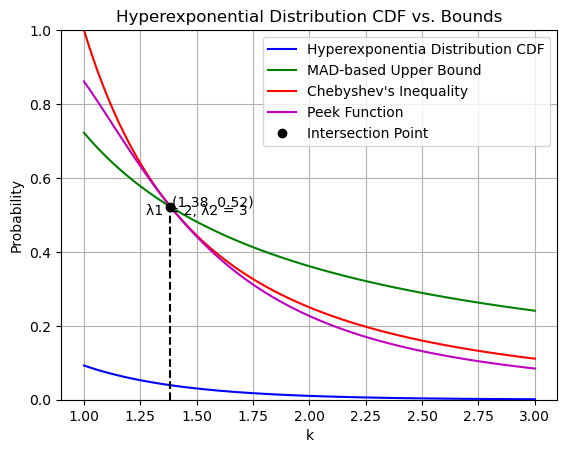